#                       TVS Credit Two wheeler Loan Defaulters

PGP DSE Online May 2021 A Batch   

Group No : 5

Team Members :
* Arunmozhi S
* Kameshwaran G
* Sruthi B
* Venkatesh TK 

Mentor : Mrs Vidhya K

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,cohen_kappa_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [2]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_excel('final_data1.xlsx')

In [4]:
df_TVS=df.copy()

In [5]:
df_TVS.head()

,Customer ID,EMI,Loan Amount,Tenure,Dealer codes,Product code,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type,DOB,Age,Total_No_of_loans,Maximum amount sanctioned for any Two wheeler loan,Tier,Def / Non
0,1,2432.000000,46500.000000,24.000000,1385.000000,SC,0.000000,12.750000,FEMALE,HOUSEWIFE,OWNED,1974-05-30,40.000000,1.000000,46500.000000,TIER 1,0.000000
1,2,1495.000000,28168.000000,24.000000,2496.000000,MO,0.000000,13.650000,MALE,SELF,RENT,1967-09-01,47.000000,1.000000,28168.000000,TIER 1,0.000000
2,3,1707.000000,38900.000000,30.000000,1346.000000,SC,0.000000,12.650000,MALE,SELF,RENT,1983-05-04,31.000000,9.000000,38900.000000,TIER 1,0.000000
3,4,2128.000000,42900.000000,24.000000,1375.000000,SC,2.000000,9.500000,FEMALE,SAL,RENT,1989-12-10,24.000000,1.000000,42900.000000,TIER 1,0.000000
4,5,1824.000000,40900.000000,30.000000,4140.000000,MC,0.000000,13.500000,MALE,SAL,RENT,1984-09-24,30.000000,1.000000,40900.000000,TIER 1,0.000000


In [6]:
df_TVS.shape

(119528, 17)

In [7]:
df_TVS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 17 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Customer ID                                         119528 non-null  int64         
 1   EMI                                                 85048 non-null   float64       
 2   Loan Amount                                         85048 non-null   float64       
 3   Tenure                                              85048 non-null   float64       
 4   Dealer codes                                        85048 non-null   float64       
 5   Product code                                        85047 non-null   object        
 6   No of advance EMI paid                              85047 non-null   float64       
 7   Rate of interest                                    85047 non-null   float64       

## Renaming the Columns

In [8]:
df_TVS.rename(columns={'Maximum amount sanctioned for any Two wheeler loan' : 'Max_amount_sanctioned','Dealer codes ' : 'Dealer_codes',
                       'Product code' : 'Product_code','No of advance EMI paid' : 'Advance_EMI_paid','Rate of interest' : 'ROI',
                        'Gender ': 'Gender','Employment type':'Employment_type',
                       'Resident type':'Resident_type','Age ':'Age','Max amount sanctioned':'Max_amt_sanctioned','Loan Amount': 'Loan_Amount',
                      'Tier ': 'Tier', 'Def / Non': 'Def/Non'}, inplace=True)

In [9]:
df_TVS['Def/Non']=df_TVS['Def/Non'].replace({0:'Non-Def',1:'Def'})

In [10]:
df_TVS['Def/Non'].value_counts()

Non-Def    116913
Def          2614
Name: Def/Non, dtype: int64

# Dropping Insignificant Variables

In [11]:
df_TVS.drop(columns=['Customer ID','DOB'], inplace=True)

In [12]:
df_TVS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EMI                    85048 non-null   float64
 1   Loan_Amount            85048 non-null   float64
 2   Tenure                 85048 non-null   float64
 3   Dealer_codes           85048 non-null   float64
 4   Product_code           85047 non-null   object 
 5   Advance_EMI_paid       85047 non-null   float64
 6   ROI                    85047 non-null   float64
 7   Gender                 85047 non-null   object 
 8   Employment_type        85047 non-null   object 
 9   Resident_type          84130 non-null   object 
 10  Age                    85047 non-null   float64
 11  Total_No_of_loans      119527 non-null  float64
 12  Max_amount_sanctioned  104467 non-null  float64
 13  Tier                   119527 non-null  object 
 14  Def/Non                119527 non-nu

### % of Null Values

In [13]:
df_TVS.shape

(119528, 15)

In [14]:
tot_loan_zero=list(df_TVS[df_TVS['Total_No_of_loans']==0].index)

In [15]:
df_TVS.drop(index=tot_loan_zero,inplace=True)

In [16]:
round(df_TVS.isnull().sum()*100/len(df),2)

EMI                     25.220000
Loan_Amount             25.220000
Tenure                  25.220000
Dealer_codes            25.220000
Product_code            25.220000
Advance_EMI_paid        25.220000
ROI                     25.220000
Gender                  25.220000
Employment_type         25.220000
Resident_type           25.880000
Age                     25.220000
Total_No_of_loans        0.000000
Max_amount_sanctioned    0.000000
Tier                     0.000000
Def/Non                  0.000000
dtype: float64

In [17]:
df_TVS.shape

(104468, 15)

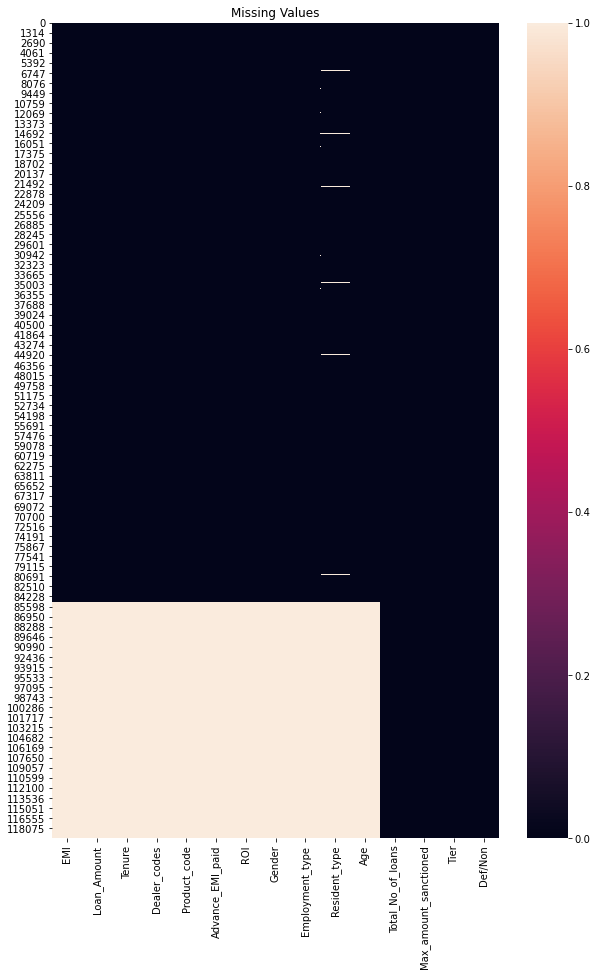

In [18]:
plt.figure(figsize=(10,15))
sns.heatmap(df_TVS.isnull())
plt.title('Missing Values')
plt.show()

* From the heatmap, it is evident that most of the records are having null values. So we are dropping the records that does not contain atleast 5 non null values

In [19]:
df_TVS=df_TVS.dropna(thresh=5) # each record should contain atleast 5 non null values

In [20]:
df_TVS.shape

(74318, 15)

In [21]:
df_TVS.isnull().sum()

EMI                        0
Loan_Amount                0
Tenure                     0
Dealer_codes               0
Product_code               0
Advance_EMI_paid           0
ROI                        0
Gender                     0
Employment_type            0
Resident_type            786
Age                        0
Total_No_of_loans          0
Max_amount_sanctioned      0
Tier                       0
Def/Non                    0
dtype: int64

In [22]:
df_TVS['Resident_type'].unique()

array(['OWNED', 'RENT', nan, 'OWENED BY OFFICE'], dtype=object)

In [23]:
df_TVS['Resident_type'].mode()

0    OWNED
dtype: object

In [24]:
df_TVS['Resident_type']=df_TVS['Resident_type'].fillna('OWNED')

*   Since we have null values and its a categorical column, we are replacing null with Mode (OWNED).

In [25]:
df_TVS.isnull().sum()

EMI                      0
Loan_Amount              0
Tenure                   0
Dealer_codes             0
Product_code             0
Advance_EMI_paid         0
ROI                      0
Gender                   0
Employment_type          0
Resident_type            0
Age                      0
Total_No_of_loans        0
Max_amount_sanctioned    0
Tier                     0
Def/Non                  0
dtype: int64

### Outlier Analysis

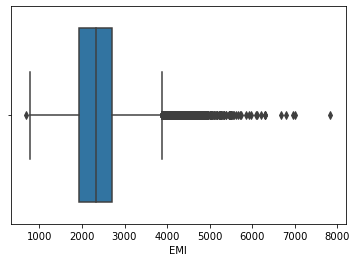

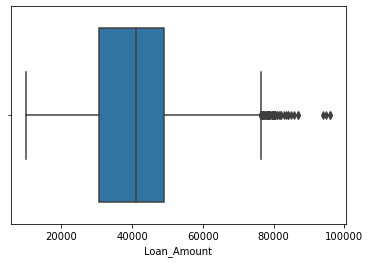

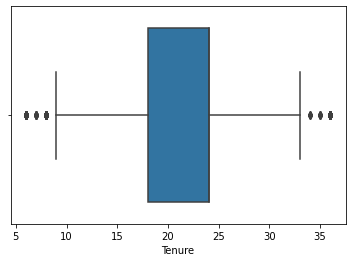

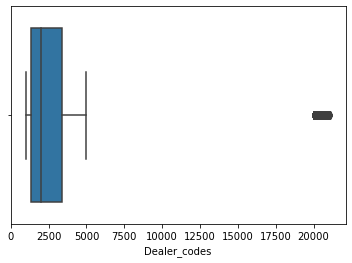

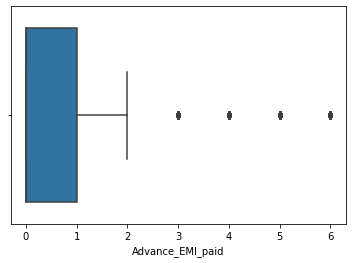

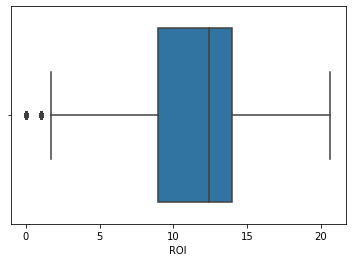

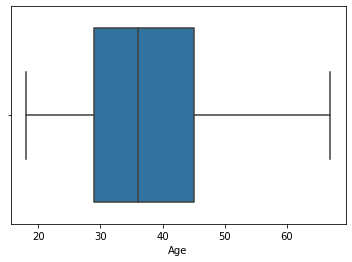

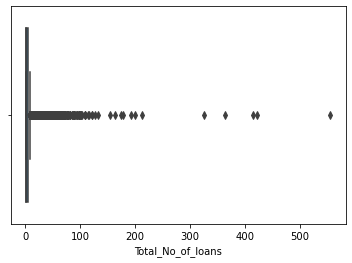

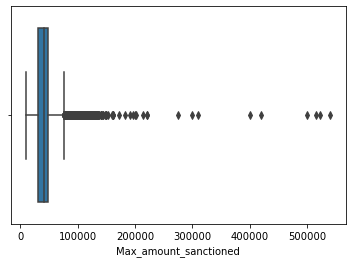

In [26]:
for i in df_TVS.select_dtypes(include=np.number).columns:
    sns.boxplot(data=df_TVS,x=i)
    plt.show()

* Since it is a Financial dataset all the records will have an impact on business, so we are not removing/dropping the outliers.

# EDA

### UNIVARATE

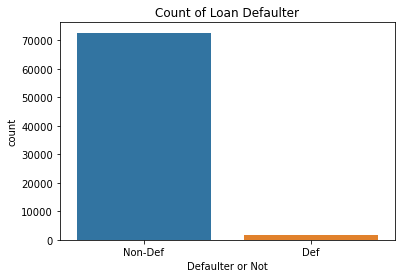

In [27]:
sns.countplot(data=df_TVS, x='Def/Non')
plt.title('Count of Loan Defaulter')
plt.xlabel('Defaulter or Not')
plt.show()

* From the above plot, we can conclude that the dataset is biased as the number of Non_defaulters are very high when compared to Defaulters.

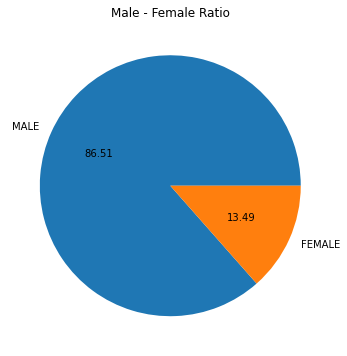

In [28]:
plt.figure(figsize=(12,6))
per=df_TVS['Gender'].value_counts()
plt.pie(x=per,labels=per.index,autopct='%1.2f')
plt.title('Male - Female Ratio')
plt.show()

* From the plot it is evident that Male customers are more in number when compared to Female customers.

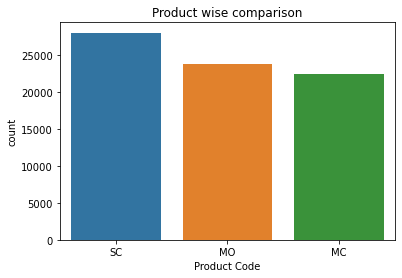

In [29]:
sns.countplot(data=df_TVS, x='Product_code')
plt.title('Product wise comparison')
plt.xlabel('Product Code')
plt.show()

* From the above plot, we can infer that two-wheeler vehicle loan is offered mostly for Scooters, followed by Mopeds and Motorcycles

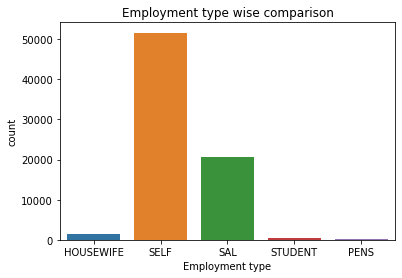

In [30]:
sns.countplot(data=df_TVS, x='Employment_type')
plt.title('Employment type wise comparison')
plt.xlabel('Employment type')
plt.show()

* From the above plot, we can infer that Self-Employed and Salaried customers are seeking the loan most.

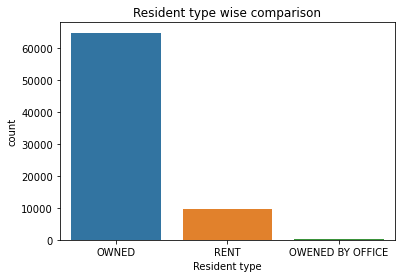

In [31]:
sns.countplot(data=df_TVS, x='Resident_type')
plt.title('Resident type wise comparison')
plt.xlabel('Resident type')
plt.show()

* From the above plot, we can infer that customers who own a house opting the Two-wheeler loan most.

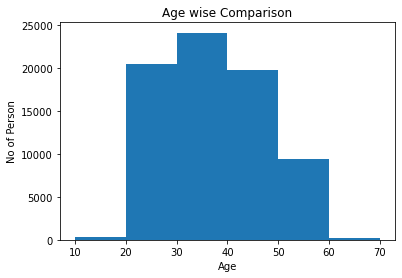

In [32]:
plt.hist(df_TVS['Age'],bins=[10,20,30,40,50,60,70])
plt.xlabel('Age')
plt.ylabel('No of Person')
plt.title('Age wise Comparison')
plt.show()

* From the above plot, we can infer that customer in the age bracket of 20-50 where opting the Two-wheelers loan most.

### Bi-Variate

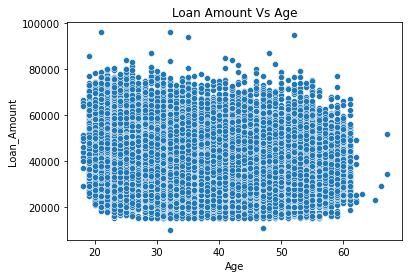

In [33]:
sns.scatterplot(data=df_TVS, x='Age', y='Loan_Amount')
plt.title('Loan Amount Vs Age')
plt.show()

* From the above plot, We can infer that Loan amount is independent of Age.

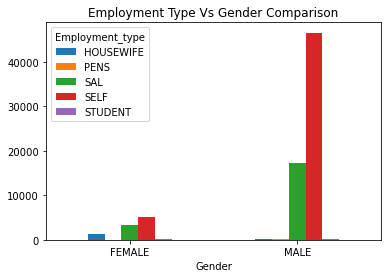

In [34]:
pd.crosstab(index=df_TVS['Gender'], columns=df_TVS['Employment_type']).plot(kind='bar',stacked=False)
plt.title('Employment Type Vs Gender Comparison')
plt.xticks(rotation='horizontal')
plt.show()

* From the above plot, it is clearly visible that Customer who are Salaried and Self-employed seeking the loan most irrespective of Gender.

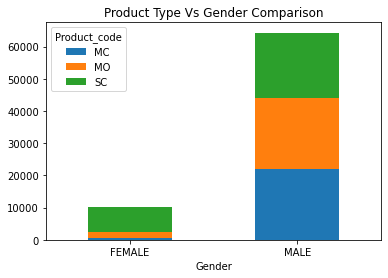

In [35]:
pd.crosstab(index=df_TVS['Gender'], columns=df_TVS['Product_code']).plot(kind='bar',stacked=True)
plt.title('Product Type Vs Gender Comparison')
plt.xticks(rotation='horizontal')
plt.show()

* From the above plot, we infer that there is no significant difference in Product type among Male customers.
* Whereas Female customers prefer Scooters the most.

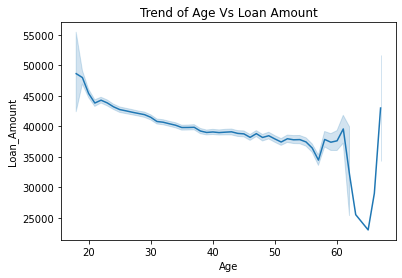

In [36]:
sns.lineplot(data=df_TVS, x='Age', y='Loan_Amount')
plt.title('Trend of Age Vs Loan Amount')
plt.show()

* From the above plot, we can infer that we have downward trend upto the age of 60.
* we can infer young age people prefer high end bikes, whereas as the age increases the usage of high end bikes decreases among the customers.


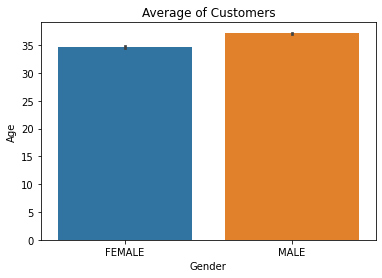

In [37]:
sns.barplot(data=df_TVS, x='Gender', y= 'Age')
plt.title('Average of Customers')
plt.show()

* From the above plot, we can infer that Average age of the Male and Female customers doesn't differ much.

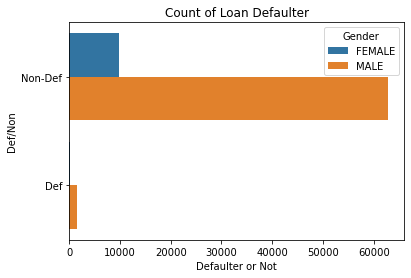

In [38]:
sns.countplot(data=df_TVS, y='Def/Non',hue='Gender')
plt.title('Count of Loan Defaulter')
plt.xlabel('Defaulter or Not')
plt.show()

* From the above plot we can conclude that females will not default their two-wheeler loans

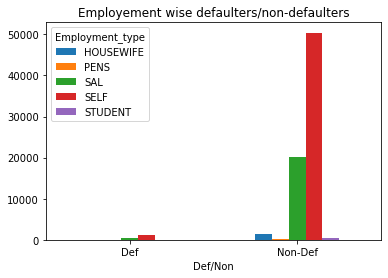

In [39]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Employment_type']).plot(kind='bar')
plt.title('Employement wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

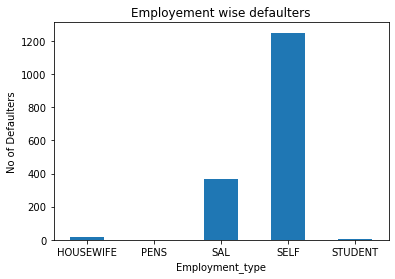

In [40]:
plt.title('Employement wise defaulters')
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Employment_type']).iloc[0,].plot(kind='bar')
plt.ylabel('No of Defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* From the above plots we can infer that self-employed are mostly non-defaulters. And very few defaulters are found in Housewife, Pensioners and Student categories when compared to salaried and Self-Employed.

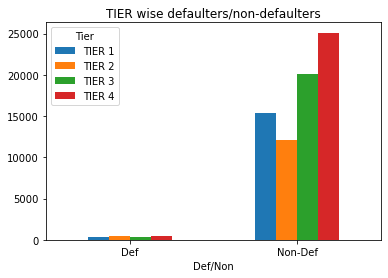

In [41]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Tier']).plot(kind='bar')
plt.title('TIER wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

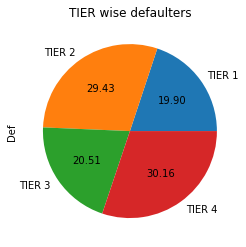

In [42]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Tier']).iloc[0,].plot(kind='pie', autopct='%1.2f')
plt.title('TIER wise defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* From the above 2 plots we can infer that the customers from tier 4 are mostly non – defaulters and no. of defaulters are almost same across all tiers.

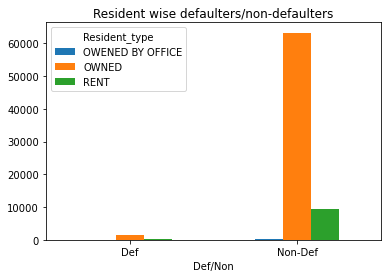

In [43]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Resident_type']).plot(kind='bar')
plt.title('Resident wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

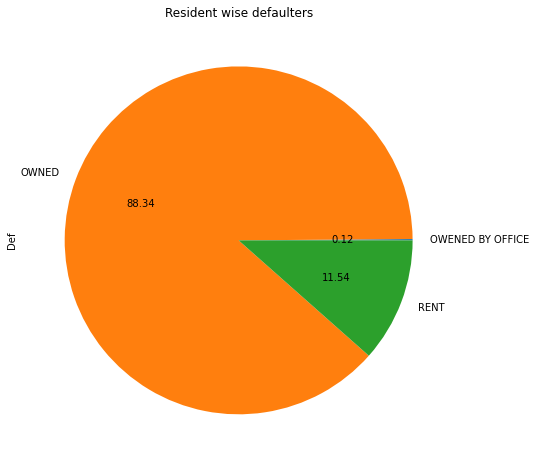

In [44]:
plt.figure(figsize=(8,8))
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Resident_type']).iloc[0,].plot(kind='pie',autopct='%1.2f')
plt.title('Resident wise defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* Customers with own house default their loans mostly when compared with other two categories.

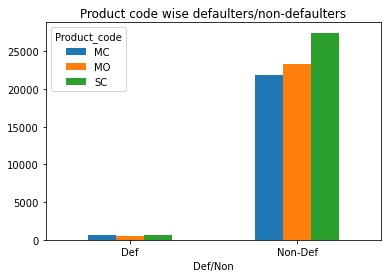

In [45]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Product_code']).plot(kind='bar')
plt.title('Product code wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

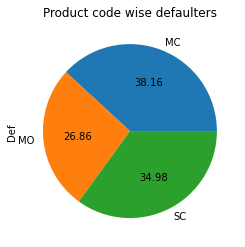

In [46]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Product_code']).iloc[0,].plot(kind='pie', autopct='%1.2f')
plt.title('Product code wise defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* The count of non-defaulters are high in Scooter category. Whereas the no of defaulters are nearly same across Motorcycle and Scooter categories

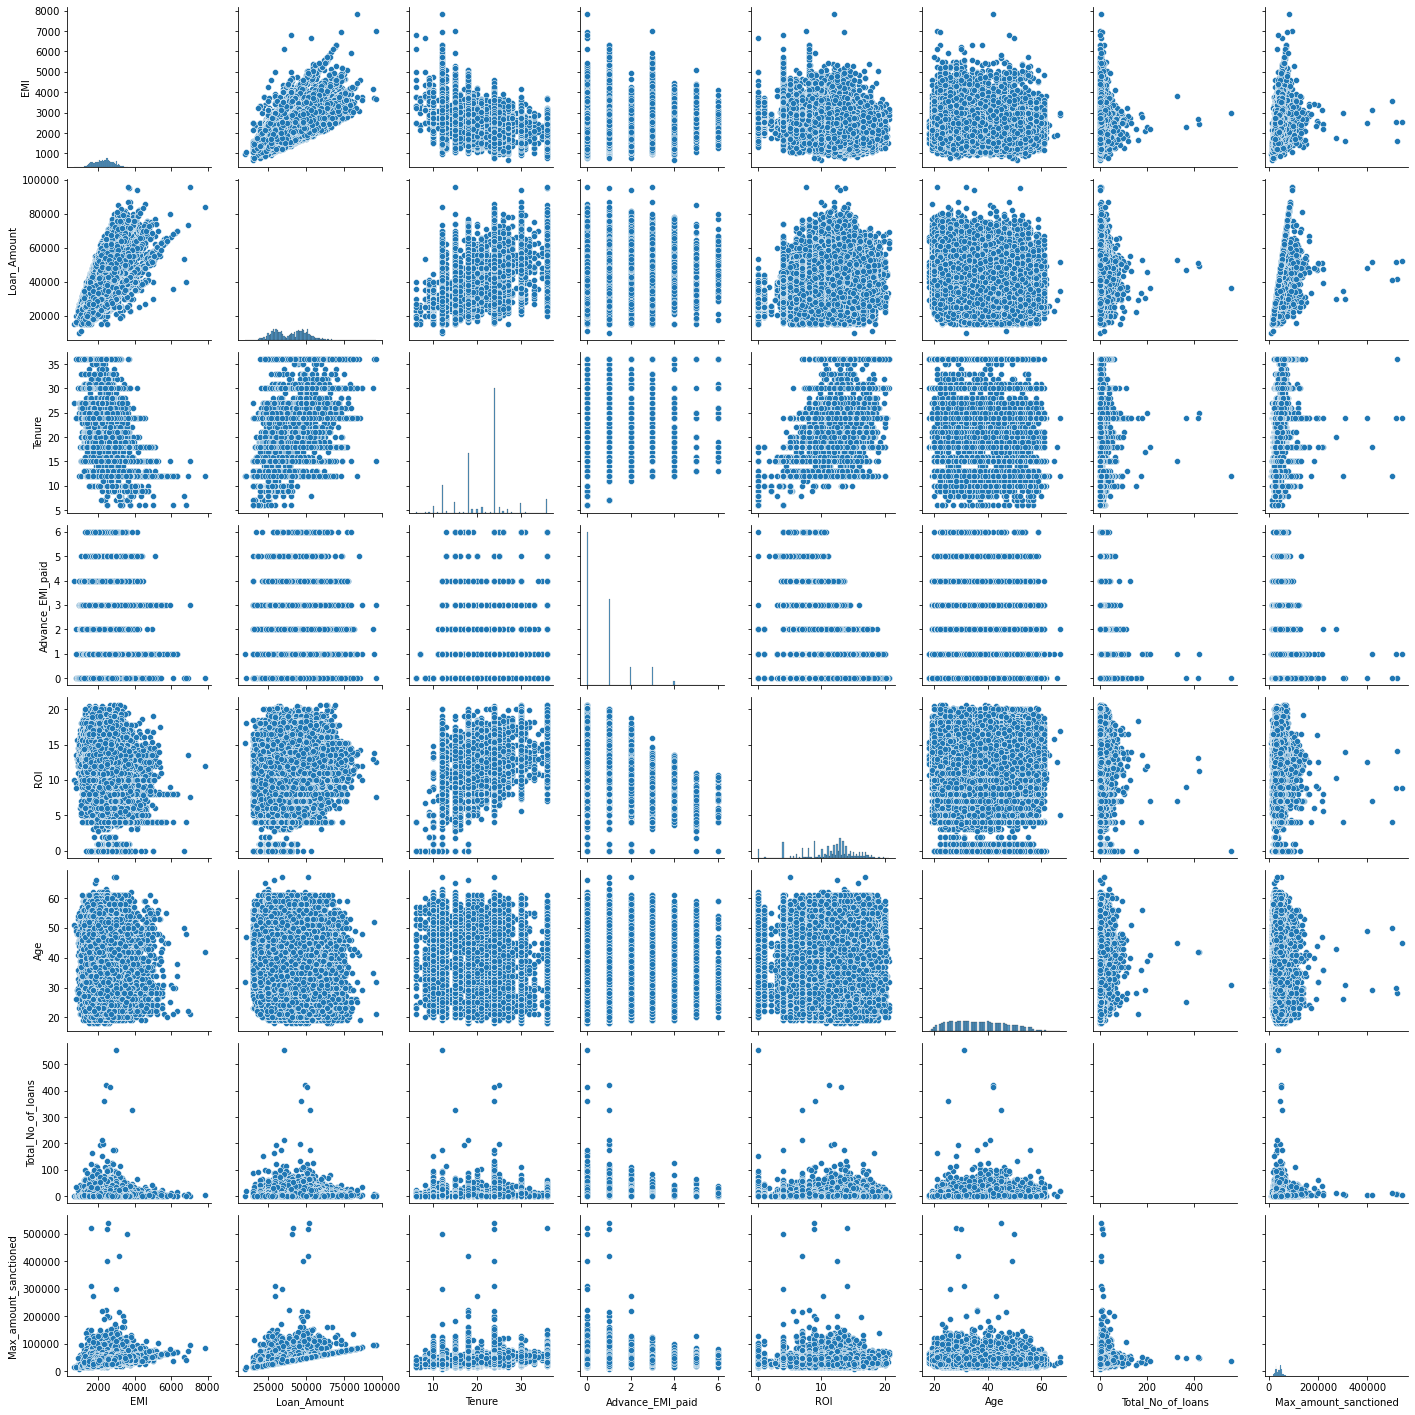

In [47]:
sns.pairplot(df_TVS.drop(columns='Dealer_codes'))
plt.show()

* From the above pair plot, we can infer that Loan Amount and EMI has postive Correlation.

In [48]:
pd.crosstab(index=df_TVS['Def/Non'], columns=df_TVS['Advance_EMI_paid'])

Advance_EMI_paid,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
Def/Non,,,,,,,
Def,1014,391,98,101,28,3,3
Non-Def,39427,22351,4803,4693,1150,184,72


* From the above table, we can see that customer who are paying advance EMI will also Default the Loan.

### SMOTE

In [49]:
num_col = df_TVS.select_dtypes(include=np.number)

In [50]:
cat_col = df_TVS.select_dtypes(exclude=np.number)
cat_col.head()

,Product_code,Gender,Employment_type,Resident_type,Tier,Def/Non
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1,Non-Def
1,MO,MALE,SELF,RENT,TIER 1,Non-Def
2,SC,MALE,SELF,RENT,TIER 1,Non-Def
3,SC,FEMALE,SAL,RENT,TIER 1,Non-Def
4,MC,MALE,SAL,RENT,TIER 1,Non-Def


In [51]:
X = df_TVS.drop(columns='Def/Non')
y = df_TVS['Def/Non']

In [52]:
y.value_counts()

Non-Def    72680
Def         1638
Name: Def/Non, dtype: int64

In [53]:
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)

* Here 0 for Defaulters and 1 for Non defaulters

In [54]:
smote = SMOTE(sampling_strategy=0.25)
X_sm,y_sm = smote.fit_resample(X,y)

In [55]:
print(X_sm.shape)
y_sm.value_counts()

(90850, 21)


Non-Def
1          72680
0          18170
dtype: int64

### SCALING

In [56]:
mm = MinMaxScaler()

In [57]:
X_ss = mm.fit_transform(X_sm)
X_sm = pd.DataFrame(data=X_ss, columns = X_sm.columns, index=X_sm.index)
X_sm.head()

,EMI,Loan_Amount,Tenure,Dealer_codes,Advance_EMI_paid,ROI,Age,Total_No_of_loans,Max_amount_sanctioned,Product_code_MO,Product_code_SC,Gender_MALE,Employment_type_PENS,Employment_type_SAL,Employment_type_SELF,Employment_type_STUDENT,Resident_type_OWNED,Resident_type_RENT,Tier_TIER 2,Tier_TIER 3,Tier_TIER 4
0,0.244587,0.424419,0.600000,0.019100,0.000000,0.617433,0.448980,0.000000,0.068868,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.113703,0.211256,0.600000,0.074360,0.000000,0.661017,0.591837,0.000000,0.034279,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,0.143316,0.336047,0.800000,0.017160,0.000000,0.612591,0.265306,0.014440,0.054528,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.202123,0.382558,0.600000,0.018602,0.333333,0.460048,0.122449,0.000000,0.062075,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.159659,0.359302,0.800000,0.156130,0.000000,0.653753,0.244898,0.000000,0.058302,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


### Splitting

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63595, 21)
(27255, 21)
(63595, 1)
(27255, 1)


### MODEL BUlIDING

* Logisitc Regression
* KNN
* Decision Tree
* Random Forest

In [59]:
def performance_all(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    f1_train_wt = f1_score(y_train,y_train_pred,average='weighted')
    f1_test_wt = f1_score(y_test,y_test_pred,average='weighted')
    acc_train = accuracy_score(y_train,y_train_pred)
    acc_test = accuracy_score(y_test,y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    scores = cross_val_score(model,X_train,y_train,cv=3,scoring='f1_weighted')
    bias = 1-np.mean(scores)
    var =  np.std(scores)/np.mean(scores)
    return str(model),acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var

In [60]:
per_df = pd.DataFrame(columns=['Model','Acc_train','Acc_test',
                    'F1_train_wt','F1_test_wt','ROC_AUC_Score','Bias','Variance']) 

def alg(model,i):
    model.fit(X_train,y_train)
    mo,acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var=performance_all(model)
    per_df.loc[i] = [mo,acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var]
    return per_df

#### Logistic Regression

In [61]:
lr = LogisticRegression()

In [62]:
alg(lr,0)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312


* Logistic Regression gives a Accuracy Score of 89% and we can't only rely on the Accuracy Score
* The Model has a good F1_score in both train and test dataset.

### KNN

In [63]:
knn = KNeighborsClassifier()

In [64]:
alg(knn,1)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626


* KNN classifier gives better Accuracy and F1 score than Logistic Regression.
* We can see that Bias has dropped significant.

### KNN Tuning

In [65]:
params={'n_neighbors':list(range(3,10)),'weights':['uniform','distance']}
tunned_knn=GridSearchCV(param_grid=params,estimator=KNeighborsClassifier(),cv=5,scoring='f1_weighted')
tunned_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [66]:
tunned_knn_best_params=tunned_knn.best_params_
tunned_knn_best_params

{'n_neighbors': 4, 'weights': 'distance'}

In [67]:
tunned_knn=KNeighborsClassifier(**tunned_knn_best_params)
alg(tunned_knn,2)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461


* We got Best Params as N_Neighbors=4 and weights=Distance
* There is an increase in over all performance of the Model compared to Simple KNN model.

### Decision Tree

In [68]:
dt = DecisionTreeClassifier()

In [69]:
alg(dt,3)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461
3,DecisionTreeClassifier(),0.999937,0.936232,0.999937,0.936698,0.907209,0.069952,0.000921


* Since it is a fully grown Decision Tree, it is overfitted Model
* We should carry on with Tunned Decision Tree.

## Tunned Decision Tree

In [70]:
params={'max_depth':list(range(3,15)),'criterion':['gini','entropy']}
tunned_dt=GridSearchCV(param_grid=params,estimator=DecisionTreeClassifier(),cv=5,scoring='f1_weighted')
tunned_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14]},
             scoring='f1_weighted')

In [71]:
best=tunned_dt.best_params_
best

{'criterion': 'gini', 'max_depth': 14}

In [72]:
tunned_dt=DecisionTreeClassifier(**best)
alg(tunned_dt,4)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461
3,DecisionTreeClassifier(),0.999937,0.936232,0.999937,0.936698,0.907209,0.069952,0.000921
4,DecisionTreeClassifier(max_depth=14),0.954572,0.931169,0.953559,0.929639,0.871164,0.074254,0.000306


* From the Tunned Decision Tree, we have got the criterion as Gini with a max_depth of 14.
* Here we can see that the Model is generalized.

### RANDOM FOREST

In [73]:
rf = RandomForestClassifier()

In [74]:
alg(rf,5)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461
3,DecisionTreeClassifier(),0.999937,0.936232,0.999937,0.936698,0.907209,0.069952,0.000921
4,DecisionTreeClassifier(max_depth=14),0.954572,0.931169,0.953559,0.929639,0.871164,0.074254,0.000306
5,RandomForestClassifier(),0.999921,0.972555,0.999921,0.971905,0.935017,0.034434,0.000950


* We have a good improvement in Accuracy, F1_weighted and ROC_AUC_Score.
* Significant drop in basis and Variance, which also a good sign.

### Tunned Random Forest

In [75]:
params={'n_estimators':[75,100,125],'max_depth':list(range(8,15)),'criterion':['entropy']}
tunned_rf=GridSearchCV(param_grid=params,estimator=RandomForestClassifier(),cv=5,scoring='f1_weighted')
tunned_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [75, 100, 125]},
             scoring='f1_weighted')

In [76]:
best=tunned_rf.best_params_
best

{'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 125}

In [77]:
tunned_rf=RandomForestClassifier(**best)
alg(tunned_rf,6)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461
3,DecisionTreeClassifier(),0.999937,0.936232,0.999937,0.936698,0.907209,0.069952,0.000921
4,DecisionTreeClassifier(max_depth=14),0.954572,0.931169,0.953559,0.929639,0.871164,0.074254,0.000306
5,RandomForestClassifier(),0.999921,0.972555,0.999921,0.971905,0.935017,0.034434,0.000950
6,"RandomForestClassifier(criterion='entropy', ma...",0.957229,0.949844,0.955365,0.947214,0.876887,0.054157,0.001815


* In this Hypertuning of Random Forest with criterion as entropy, max_depth of 14 and n_estimators with 125 the Model has been generalized well.

### ADA Boosting Classifier

In [78]:
params={'base_estimator': [LogisticRegression(),KNeighborsClassifier(n_neighbors=6),
                             DecisionTreeClassifier(max_depth=14,criterion=['gini','entropy'])],'n_estimators':[75,100,125]}
grd_srch_ada = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=3,scoring='f1_weighted')
grd_srch_ada.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [LogisticRegression(),
                                            KNeighborsClassifier(n_neighbors=6),
                                            DecisionTreeClassifier(criterion='entropy',
                                                                   max_depth=14)],
                         'n_estimators': [75, 100, 125]},
             scoring='f1_weighted')

In [79]:
best=grd_srch_ada.best_params_
best

{'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=14),
 'n_estimators': 100}

In [80]:
grd_srch_ada=AdaBoostClassifier(**best)
alg(grd_srch_ada,7)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461
3,DecisionTreeClassifier(),0.999937,0.936232,0.999937,0.936698,0.907209,0.069952,0.000921
4,DecisionTreeClassifier(max_depth=14),0.954572,0.931169,0.953559,0.929639,0.871164,0.074254,0.000306
5,RandomForestClassifier(),0.999921,0.972555,0.999921,0.971905,0.935017,0.034434,0.000950
6,"RandomForestClassifier(criterion='entropy', ma...",0.957229,0.949844,0.955365,0.947214,0.876887,0.054157,0.001815
7,AdaBoostClassifier(base_estimator=DecisionTree...,0.999937,0.969363,0.999937,0.968738,0.932817,0.035544,0.004989


* When comparing with all the other algorthims AdaBoostClassifier gives very less bias value.

# Gradient Boosting Classifier

In [99]:
grd_srch = GradientBoostingClassifier()
grd_srch.fit(X_train,y_train)

GradientBoostingClassifier()

In [100]:
alg(grd_srch,8)

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461
3,DecisionTreeClassifier(),0.999937,0.936232,0.999937,0.936698,0.907209,0.069952,0.000921
4,DecisionTreeClassifier(max_depth=14),0.954572,0.931169,0.953559,0.929639,0.871164,0.074254,0.000306
5,RandomForestClassifier(),0.999921,0.972555,0.999921,0.971905,0.935017,0.034434,0.000950
6,"RandomForestClassifier(criterion='entropy', ma...",0.957229,0.949844,0.955365,0.947214,0.876887,0.054157,0.001815
7,AdaBoostClassifier(base_estimator=DecisionTree...,0.999937,0.969363,0.999937,0.968738,0.932817,0.035544,0.004989
8,GradientBoostingClassifier(),0.948314,0.948707,0.945448,0.945828,0.872485,0.054074,0.002414


* Though there is decrease in Variance when compared to ADA Boosting classifier, the accuracy, F1 Scores and ROC_AUC_Score also reduces significantly
* So, this is not the best Model.

# XG Boost Classifier

In [101]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

[23:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
alg(xgb_model,9)

[23:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model,Acc_train,Acc_test,F1_train_wt,F1_test_wt,ROC_AUC_Score,Bias,Variance
0,LogisticRegression(),0.888576,0.888975,0.881745,0.882456,0.776706,0.118248,0.003312
1,KNeighborsClassifier(),0.943942,0.920638,0.943384,0.919622,0.862925,0.089858,0.001626
2,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.999937,0.933113,0.999937,0.933106,0.894673,0.076042,0.000461
3,DecisionTreeClassifier(),0.999937,0.936232,0.999937,0.936698,0.907209,0.069952,0.000921
4,DecisionTreeClassifier(max_depth=14),0.954572,0.931169,0.953559,0.929639,0.871164,0.074254,0.000306
5,RandomForestClassifier(),0.999921,0.972555,0.999921,0.971905,0.935017,0.034434,0.000950
6,"RandomForestClassifier(criterion='entropy', ma...",0.957229,0.949844,0.955365,0.947214,0.876887,0.054157,0.001815
7,AdaBoostClassifier(base_estimator=DecisionTree...,0.999937,0.969363,0.999937,0.968738,0.932817,0.035544,0.004989
8,GradientBoostingClassifier(),0.948314,0.948707,0.945448,0.945828,0.872485,0.054074,0.002414
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.990062,0.980444,0.989968,0.980089,0.952199,0.022726,0.000729


* From all the above Models, we can see that XGBoost gives good F1 and ROC_AUC scores with very less Bias and Variance too.
* So, the preferred Model for the Loan Defaulters is XGBoost with max_depth=10 and gamma = 1.

### Tunned Bagging (knn)

In [82]:
#params={'base_estimator':[KNeighborsClassifier(n_neighbors=6, weights='distance')],'n_estimators':[125,150]}
#tunned_bagg_knn=GridSearchCV(estimator=BaggingClassifier(),param_grid=params,cv=5,scoring='f1_weighted')
#tunned_bagg_knn.fit(X_train,y_train)

In [83]:
#best=tunned_bagg_knn.best_params_
#best

In [84]:
#tunned_bagging_knn=BaggingClassifier(**best)
#alg(tunned_bagging_knn,8)